In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import random
import xgboost as xgb


from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.metrics import classification_report,fbeta_score, confusion_matrix
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import metrics


from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neighbors import KNeighborsClassifier


import statsmodels.api as sm
import statsmodels.formula.api as smf 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [58]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

In [2]:
df = pd.read_csv('/Users/evaxu/desktop/metis/capgemini/project/online_shoppers_intention.csv')

In [3]:
df.groupby(['SpecialDay']).size()

SpecialDay
0.0    11079
0.2      178
0.4      243
0.6      351
0.8      325
1.0      154
dtype: int64

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [7]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class. Call by using AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)


Shape of your Data Set: (12330, 18)
Classifying variables in data set...
    17 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Total Number of Scatter Plots = 21


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Could not draw Violin Plots
Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 5.745


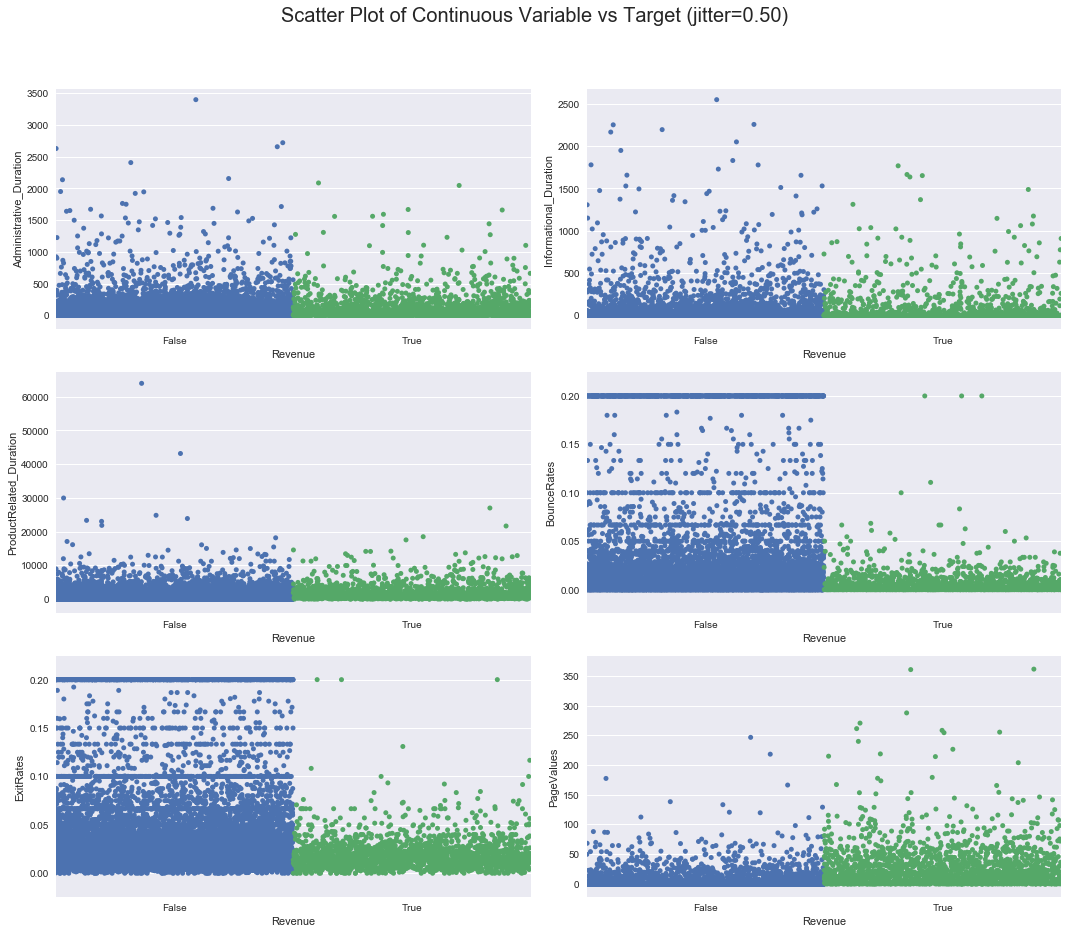

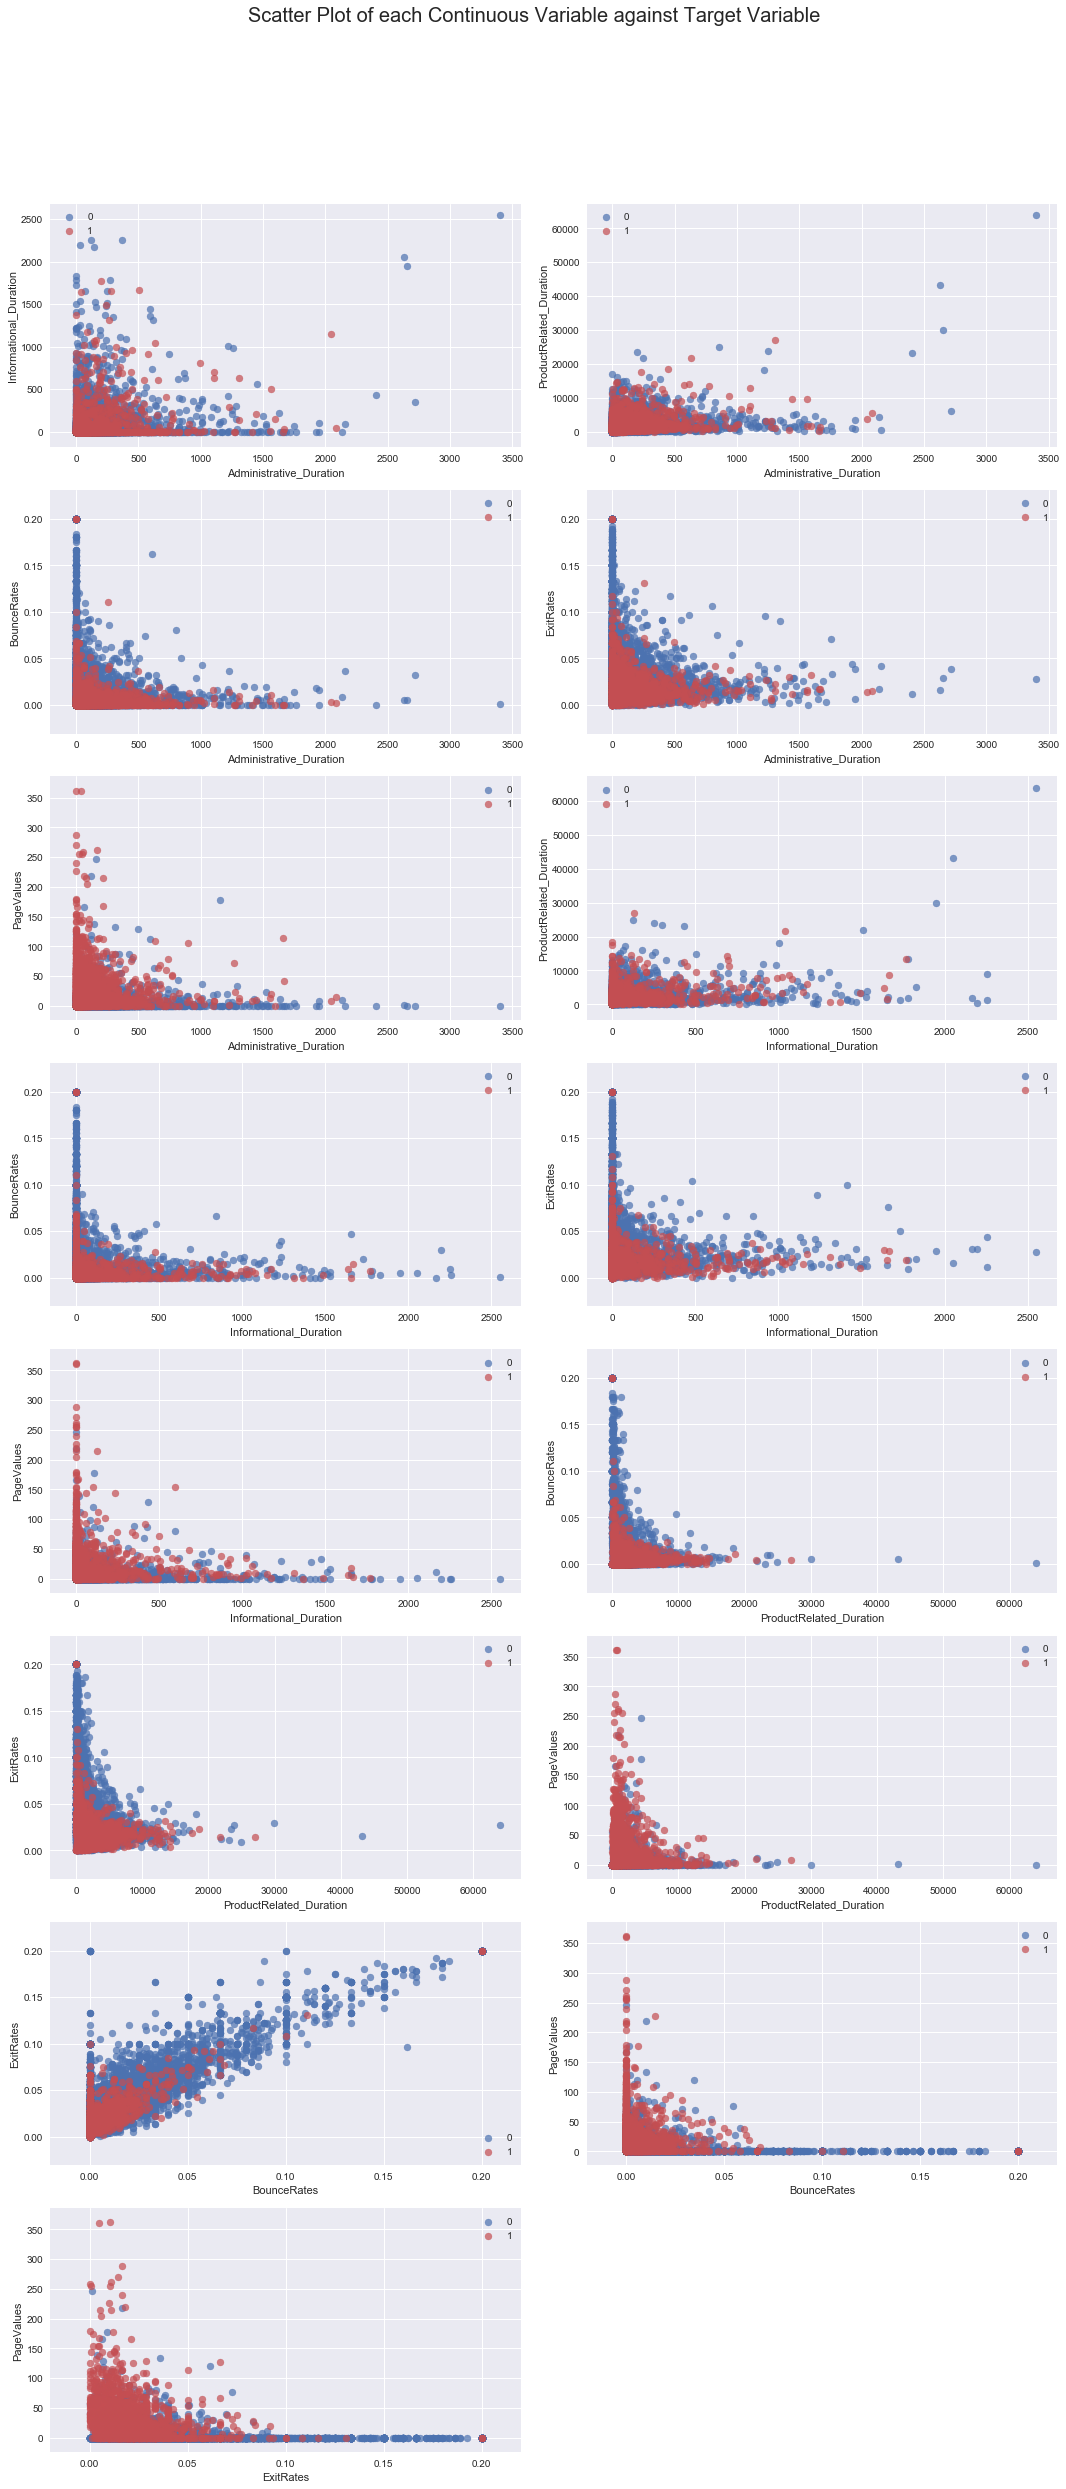

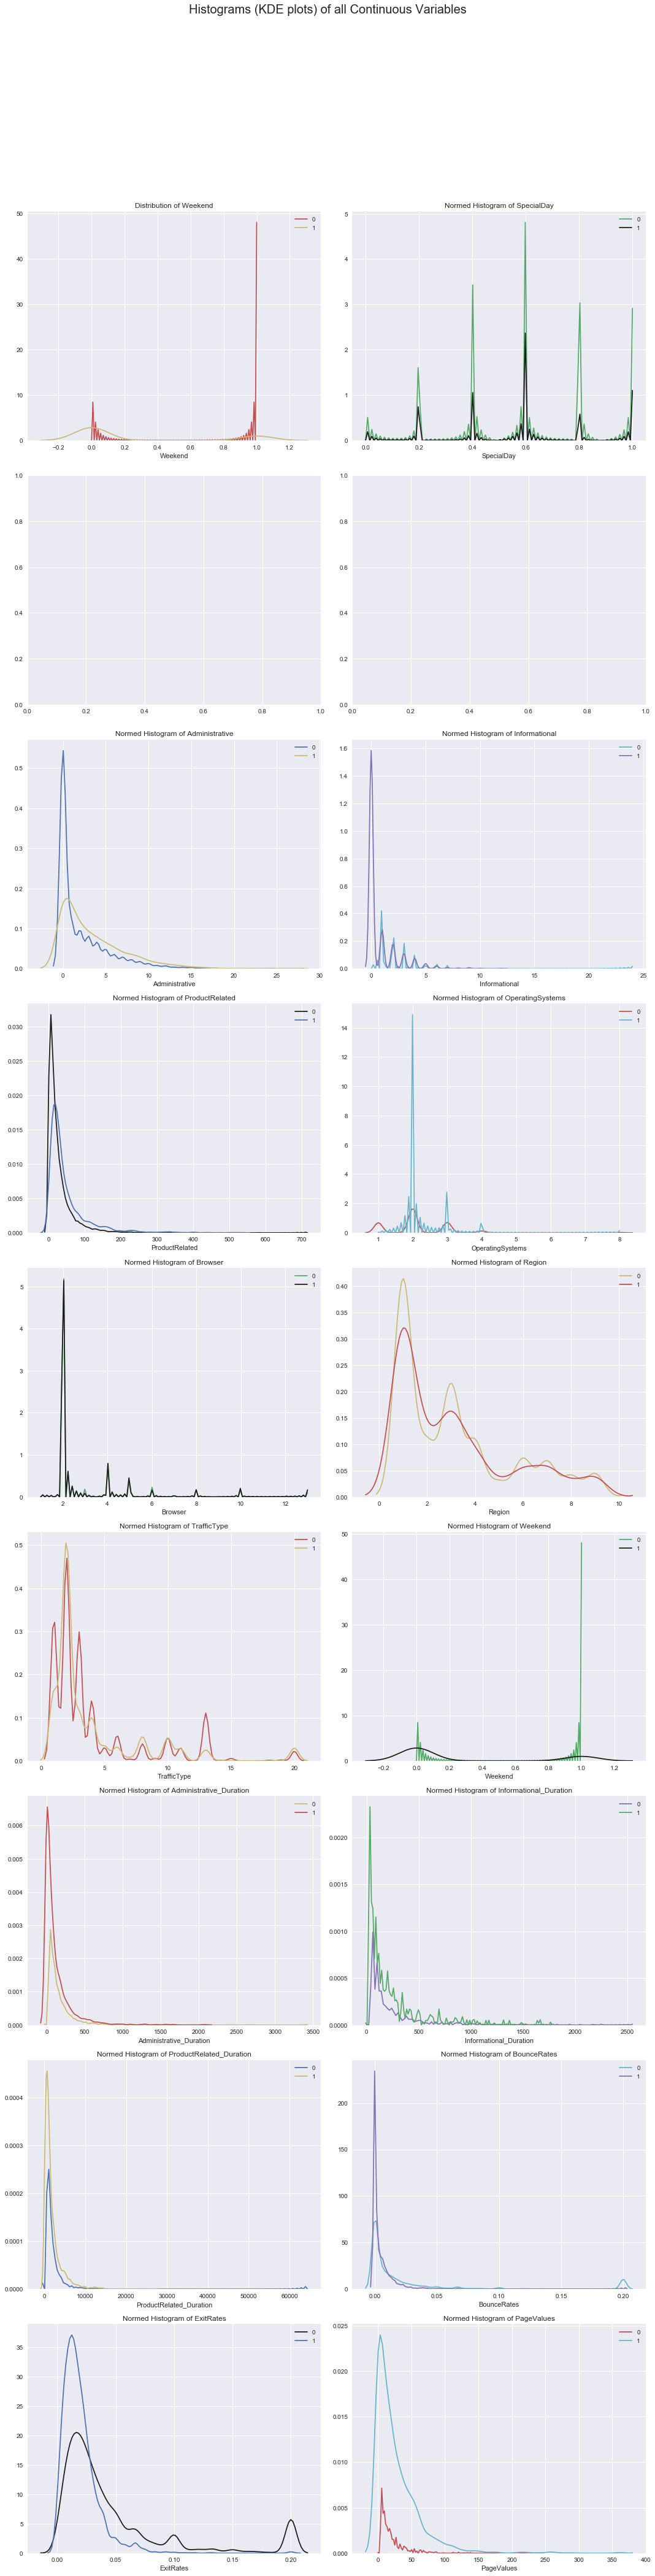

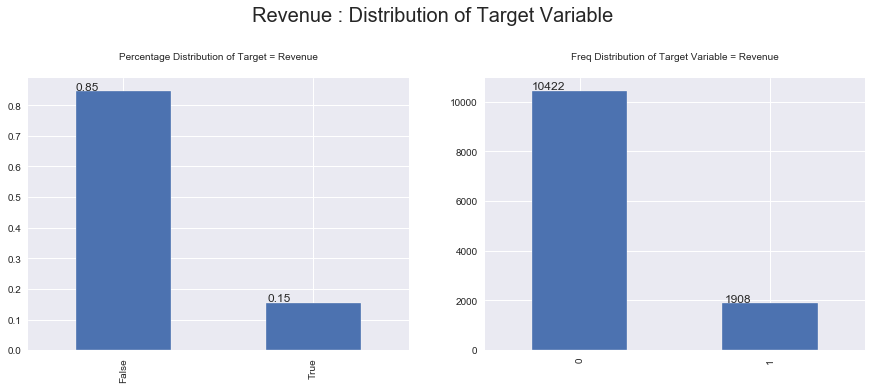

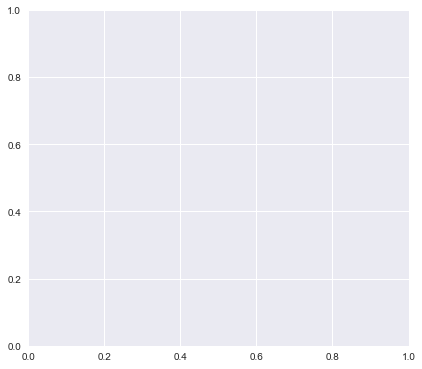

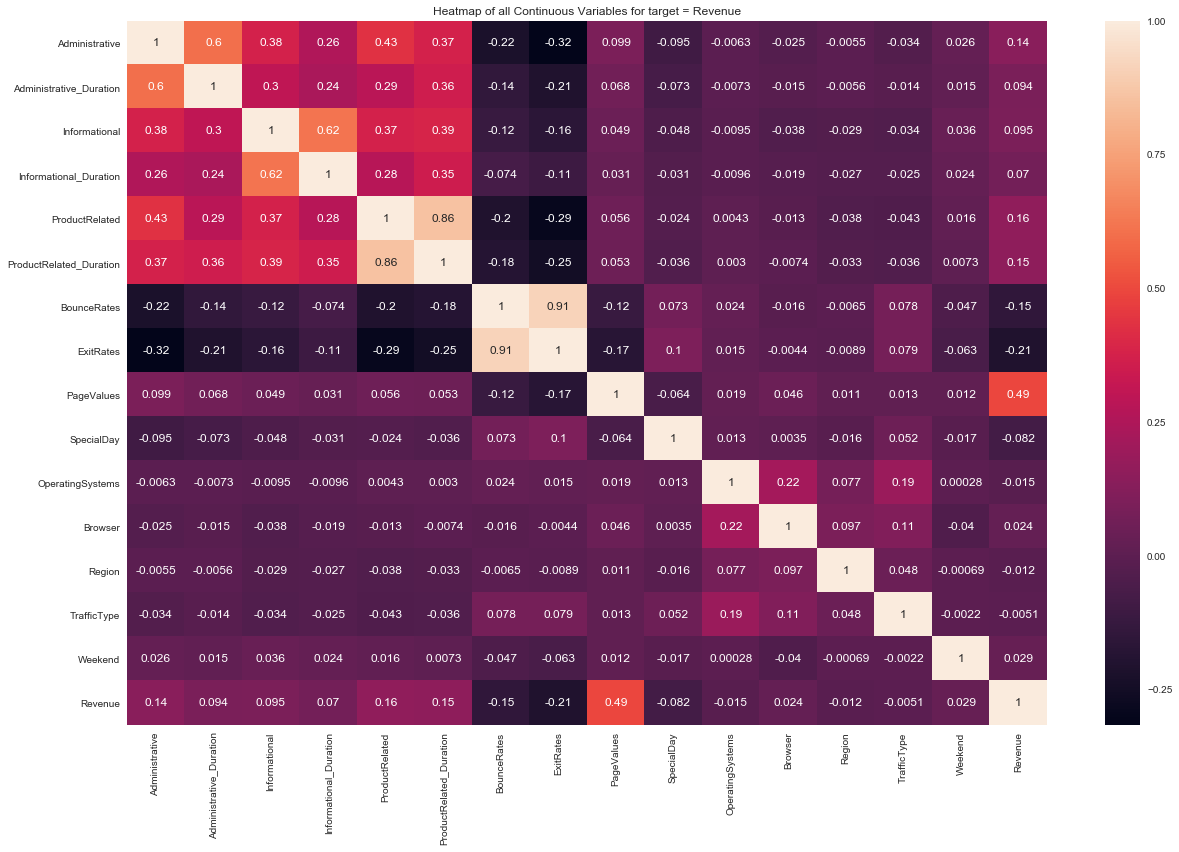

In [8]:
df_viz = AV.AutoViz('', ',', 'Revenue', df)

# EDA

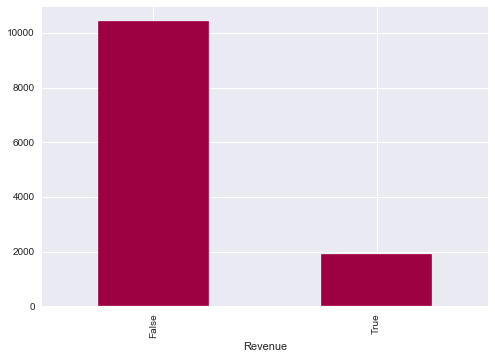

In [9]:
df.groupby(['Revenue']).size().plot(kind='bar',colormap='Spectral')

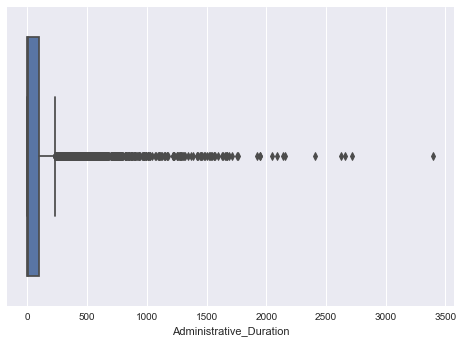

In [14]:
sns.boxplot(x=df['Administrative_Duration'])

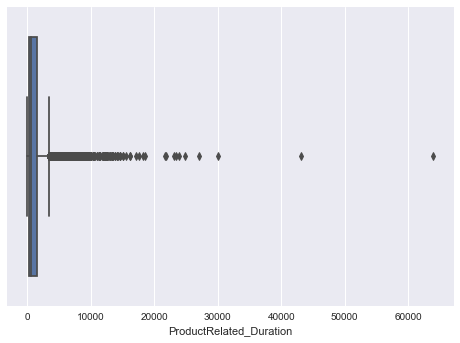

In [15]:
sns.boxplot(x=df['ProductRelated_Duration'])

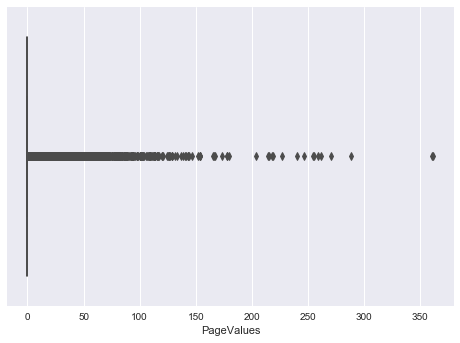

In [16]:
sns.boxplot(x=df['PageValues'])

In [17]:
df.groupby(['BounceRates']).size()

BounceRates
0.000000    5518
0.000027       1
0.000034       1
0.000038       1
0.000039       1
0.000071       1
0.000073       1
0.000075       1
0.000080       1
0.000081       1
0.000081       1
0.000098       1
0.000124       1
0.000157       1
0.000170       1
0.000170       1
0.000176       1
0.000184       1
0.000189       1
0.000199       1
0.000209       1
0.000216       1
0.000217       1
0.000223       1
0.000227       1
0.000238       1
0.000256       1
0.000260       1
0.000270       1
0.000275       1
            ... 
0.110714       1
0.111111       4
0.112500       1
0.114286       6
0.115385       1
0.120000      20
0.121429       1
0.121622       1
0.122222       3
0.125000       4
0.125926       1
0.127273       1
0.131250       1
0.133333      18
0.138462       1
0.140000       3
0.142857       4
0.146667       2
0.150000      15
0.155556       3
0.160000       3
0.161905       1
0.164231       1
0.164286       1
0.166667       4
0.175000       1
0.176923       1
0.

In [18]:
df.groupby(['Browser']).size()

Browser
1     2462
2     7961
3      105
4      736
5      467
6      174
7       49
8      135
9        1
10     163
11       6
12      10
13      61
dtype: int64

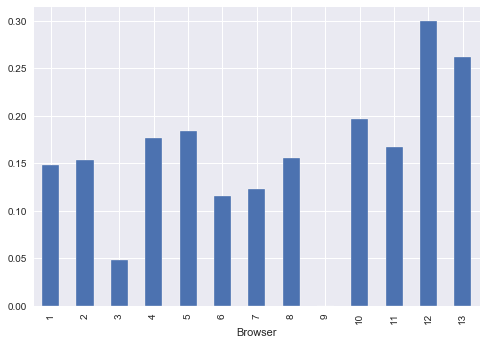

In [19]:
df.groupby(['Browser'])['Revenue'].mean().plot(kind='bar')

In [20]:
df.groupby(['Region']).size()

Region
1    4780
2    1136
3    2403
4    1182
5     318
6     805
7     761
8     434
9     511
dtype: int64

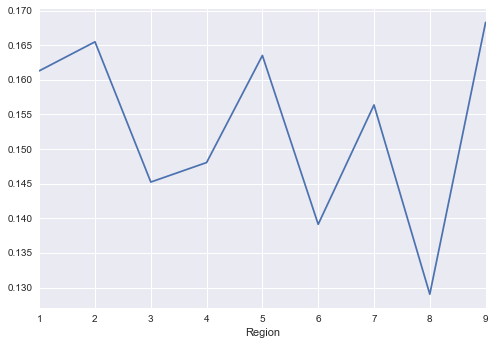

In [21]:
df.groupby(['Region'])['Revenue'].mean().plot()

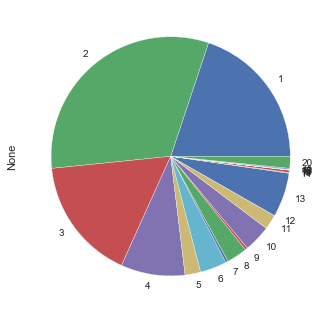

In [22]:
df.groupby(['TrafficType']).size().plot.pie()

In [23]:
df.plot.pie

<bound method FramePlotMethods.pie of <pandas.plotting._core.FramePlotMethods object at 0x1a224ee518>>

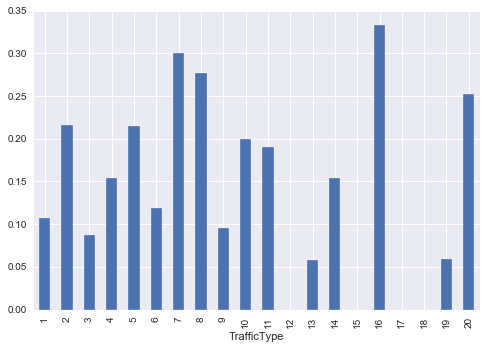

In [24]:
df.groupby(['TrafficType'])['Revenue'].mean().plot(kind='bar')

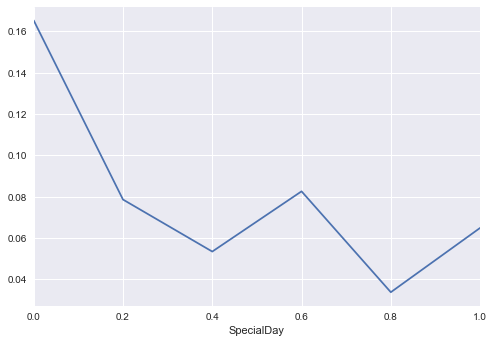

In [26]:
df.groupby(['SpecialDay'])['Revenue'].mean().plot()
# revenue doesn't improve based on special day

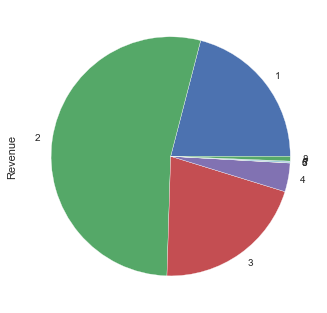

In [27]:
df.groupby(['OperatingSystems'])['Revenue'].size().plot.pie()

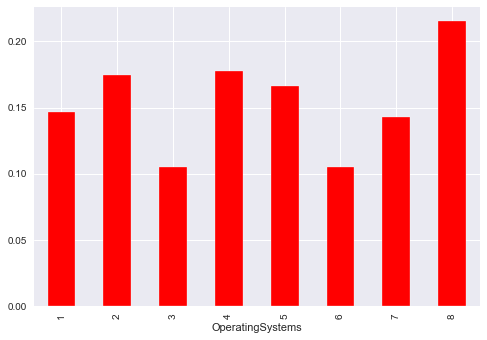

In [28]:
df.groupby(['OperatingSystems'])['Revenue'].mean().plot(kind='bar',colormap='autumn')

I would look into Operating System 3 and see if the interface/user experience is lacking. There are a significant portion of users who use operating system 3, and the conversion rate for operating system 3 is significantly less at .11

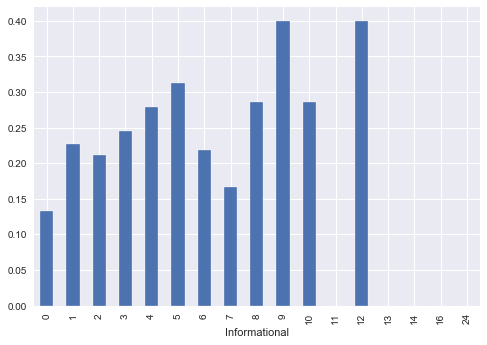

In [29]:
df.groupby(['Informational'])['Revenue'].mean().plot(kind='bar')
# most people do not view the information pages

In [30]:
df.groupby(['Informational']).size()

Informational
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
8       14
9       15
10       7
11       1
12       5
13       1
14       2
16       1
24       1
dtype: int64

In [31]:
df[df['ProductRelated_Duration']<100].count()

Administrative             2122
Administrative_Duration    2122
Informational              2122
Informational_Duration     2122
ProductRelated             2122
ProductRelated_Duration    2122
BounceRates                2122
ExitRates                  2122
PageValues                 2122
SpecialDay                 2122
Month                      2122
OperatingSystems           2122
Browser                    2122
Region                     2122
TrafficType                2122
VisitorType                2122
Weekend                    2122
Revenue                    2122
dtype: int64

In [32]:
df[df['ProductRelated_Duration']<50].groupby(['ProductRelated_Duration'])['Revenue'].sum().sum()

48.0

In [33]:
df[df['ProductRelated_Duration']>100].groupby(['ProductRelated_Duration'])['Revenue'].sum().sum()

1828.0

In [34]:
df[df['ProductRelated_Duration']>200].count()

Administrative             9075
Administrative_Duration    9075
Informational              9075
Informational_Duration     9075
ProductRelated             9075
ProductRelated_Duration    9075
BounceRates                9075
ExitRates                  9075
PageValues                 9075
SpecialDay                 9075
Month                      9075
OperatingSystems           9075
Browser                    9075
Region                     9075
TrafficType                9075
VisitorType                9075
Weekend                    9075
Revenue                    9075
dtype: int64

In [35]:
df[df['ProductRelated_Duration']>50].groupby(['ProductRelated_Duration'])['Revenue'].sum().sum()

1859.0

Duration/# of pages are important in predicting conversion rates as showcased in RF/XGboost later, these features are probably the least “actionable”. People visit many pages for a long time because they already want to buy. Also, in order to buy, you have to click on multiple pages. 

In [38]:
df.groupby(['VisitorType']).size()

VisitorType
New_Visitor           1694
Other                   85
Returning_Visitor    10551
dtype: int64

In [39]:
df.groupby(['VisitorType'])['Revenue'].mean()

VisitorType
New_Visitor          0.249115
Other                0.188235
Returning_Visitor    0.139323
Name: Revenue, dtype: float64

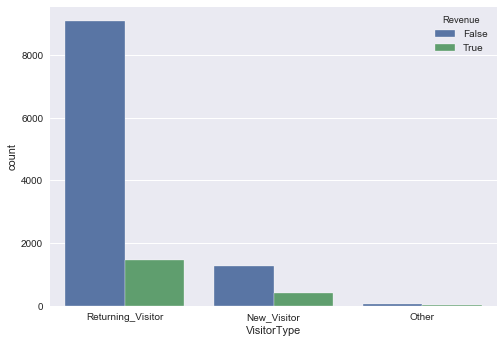

In [40]:
sns.countplot(x='VisitorType',hue='Revenue', data=df)

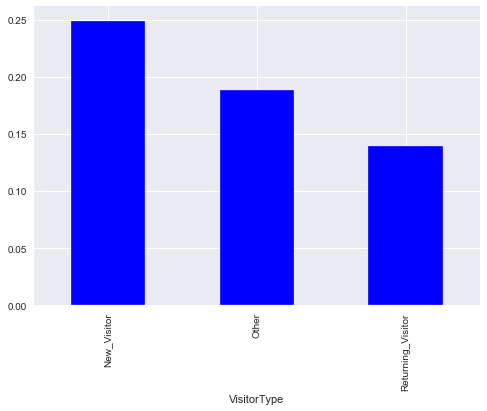

In [41]:
df.groupby(['VisitorType'])['Revenue'].mean().plot(kind='bar',colormap='winter')
#winter

Returning visitors are half as likely to purchase than new visitors. However returning visitors make up 90% of the population.

'tree_conversion.dot.pdf'

'tree_conversion1.dot.pdf'

## 

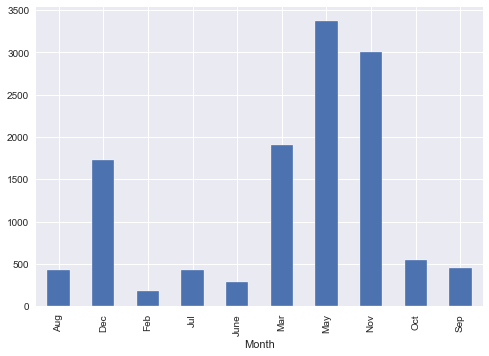

In [45]:
df.groupby(['Month']).size().plot(kind='bar')

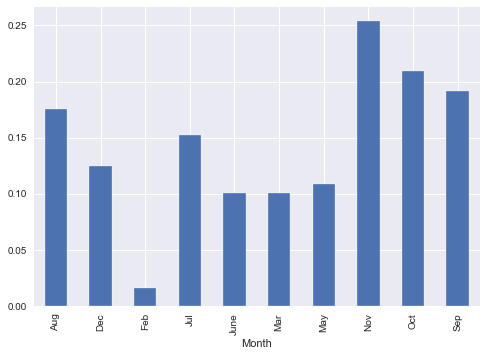

In [46]:
df.groupby(['Month'])['Revenue'].mean().plot(kind='bar')

#### March, May had significant traffic, but overall low returns. Investigate why.

In [47]:
df.groupby(['Weekend']).size()

Weekend
False    9462
True     2868
dtype: int64

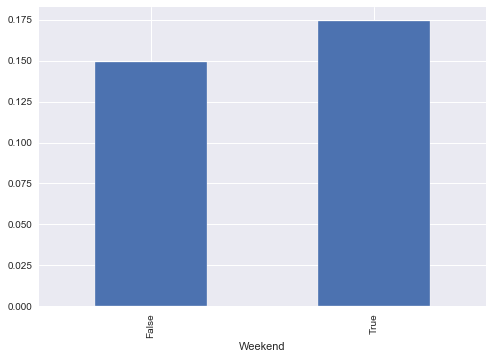

In [48]:
df.groupby(['Weekend'])['Revenue'].mean().plot(kind='bar')

# Online Shoppers Purchasing Intention 

We have a client that has collected online shopping purchasing behavior from its customers over a 1 year period.  The client would like you to build a prediction model to determine if the visit will end with an item being purchased or not.  The client is also interested in any other insights you got from the data.  

In [50]:
# dummify months

df1 = df.copy()


In [51]:
df1['OperatingSystems'] = df1['OperatingSystems'].astype(str)
df1['Browser'] = df1['Browser'].astype(str)
df1['Region'] = df1['Region'].astype(str)
df1['TrafficType'] = df1['TrafficType'].astype(str)

In [52]:
df1 = pd.get_dummies(df1)

In [53]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [54]:
y = df1.loc[:,'Revenue']
X = df1.drop(['Revenue'],axis=1)

In [55]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


#### TRAIN TEST SPLIT

In [61]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444)

# Standard Scale

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

#### model performance

In [63]:
def model_performance(model, model_type, x_validation, y_validation, hard=True, thres=.5):
    '''
    Plots the confusion matrix in a sexy way + classification report
    
    input:
    model (fitted)
    model_type =  name as a string ie "Logistic Regression"
    x_validation = x validation set
    y_validation = y validation set
    hard=True/False (determines whether using hard predictions or soft probabilities)
    thres = threshold to use for probabilities
    
    '''
    if hard==False:
        confusion_m = confusion_matrix(y_validation, model.predict_proba(x_validation)[:,1] > thres) #change 
    else:
        confusion_m = confusion_matrix(y_validation, model.predict(x_validation)) #change
        print(classification_report(y_validation, model.predict(x_validation)))

    tn, fp, fn, tp = confusion_m.ravel()
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
    
    if hard==False:
        print(classification_report(y_validation, model.predict_proba(x_validation)[:,1] > thres))
    else:
        print(classification_report(y_validation, model.predict(x_validation)))

    plt.figure(dpi=100)
    it = sns.heatmap(confusion_m, cmap=plt.cm.Blues, annot=True,  fmt='g', square=True,
           xticklabels=['No Revenue', 'Revenue'],
           yticklabels=['No Revenue', 'Revenue'])
    plt.xlabel('Predicted outcome')
    plt.ylabel('Actual outcome')
    plt.title(model_type + ' confusion matrix') #need to format so that it has the model name
    return it

#### RF Model

#### RF MODEL WITH GRID SEARCH CV

In [397]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [398]:
from sklearn.model_selection import RandomizedSearchCV

rf_base = RandomForestClassifier(class_weight={0:1,1:4})
rf = RandomizedSearchCV(estimator=rf_base, param_distributions=random_grid, n_iter=100, cv=5, 
                        verbose=2, random_state=123, n_jobs=4)
rf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   40.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  8.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight={0: 1, 1: 4},
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_j

In [399]:
rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 91}

In [422]:
random_forest = RandomForestClassifier(oob_score=True, n_estimators= 200,
 min_samples_split=5,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth= 91,
class_weight={0:1,1:4})

In [424]:
random_forest_cv = pd.DataFrame(cross_validate(random_forest, X_train, y_train, cv=5, scoring=['accuracy','precision','recall','f1'], return_train_score=True))
random_forest_cv.mean()

fit_time           1.152804
score_time         0.191383
test_accuracy      0.904532
train_accuracy     0.996553
test_precision     0.725205
train_precision    0.985616
test_recall        0.612518
train_recall       0.992099
test_f1            0.663713
train_f1           0.988844
dtype: float64

              precision    recall  f1-score   support

       False       0.93      0.95      0.94      3120
        True       0.71      0.59      0.64       579

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699

True Negatives:  2979
False Positives:  141
False Negatives:  238
True Positives:  341
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      3120
        True       0.71      0.59      0.64       579

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



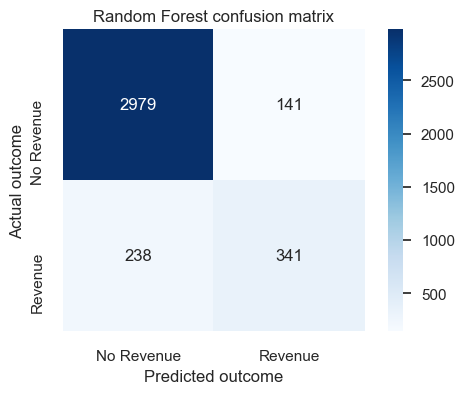

In [423]:
random_forest = random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
model_performance(random_forest, 'Random Forest',X_test, y_test);

This overfits the model, gridsearchCV is a bust.

#### Random Forest Model cont.

In [405]:
random_forest = RandomForestClassifier(oob_score=True,n_estimators=300,max_depth=3,class_weight={0:1,1:4})
random_forest = random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)

print(fbeta_score(y_test, y_pred, average='binary', beta=1))
print(fbeta_score(y_test, y_pred, average='weighted', beta=1))
print(fbeta_score(y_test, y_pred, average='macro', beta=1))
print(fbeta_score(y_test, y_pred, average='micro', beta=1))
print(random_forest.oob_score_)


0.6477187733732236
0.8793117408382601
0.7850044122599495
0.8726682887266829
0.8751013787510138


              precision    recall  f1-score   support

       False       0.95      0.90      0.92      3120
        True       0.57      0.74      0.65       579

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699

True Negatives:  2797
False Positives:  323
False Negatives:  149
True Positives:  430
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      3120
        True       0.57      0.74      0.65       579

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699



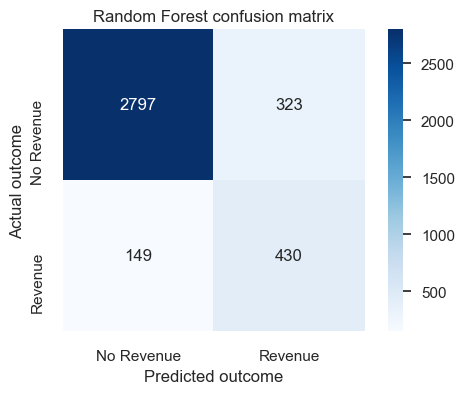

In [427]:
random_forest = random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
model_performance(random_forest, 'Random Forest',X_test, y_test);

In [425]:
random_forest = RandomForestClassifier(n_estimators=300,max_depth=3,class_weight={0:1,1:4})
random_forest_cv = pd.DataFrame(cross_validate(random_forest, X_train, y_train, cv=5, scoring=['accuracy','precision','recall','f1'], return_train_score=True))

In [426]:
random_forest_cv.mean()

fit_time           0.586013
score_time         0.145896
test_accuracy      0.876030
train_accuracy     0.879041
test_precision     0.576292
train_precision    0.581642
test_recall        0.745675
train_recall       0.764112
test_f1            0.649666
train_f1           0.660452
dtype: float64

In [395]:
rf_feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [396]:
random_forest.oob_score_

0.8747537944618237

In [ ]:
random_forest.score(y_pred,y_test)

In [251]:
rf_feature_importances.head()

,importance
PageValues,0.362242
ExitRates,0.120846
ProductRelated_Duration,0.102537
ProductRelated,0.075553
BounceRates,0.055266


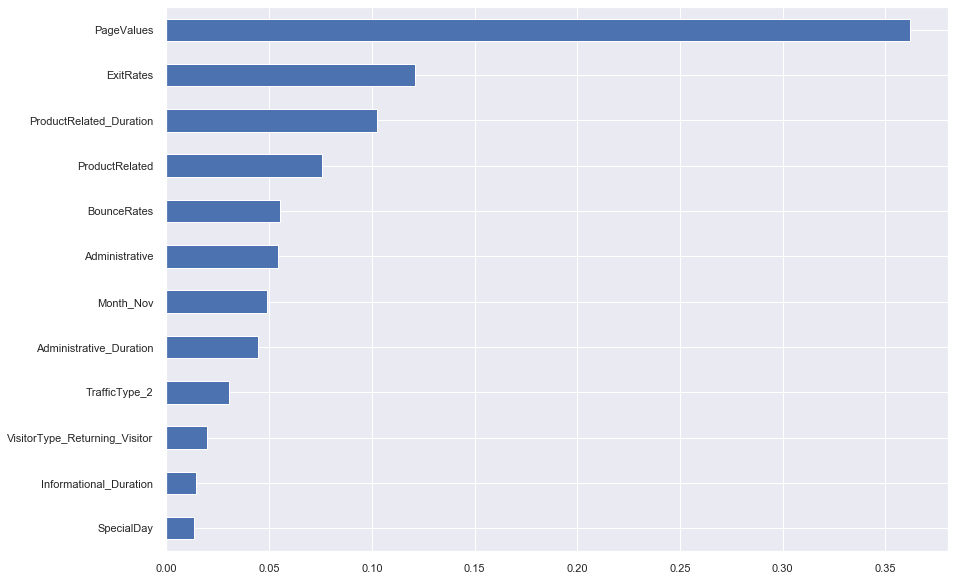

In [261]:
fig, ax = plt.subplots(figsize=(14,10))
rf_feature_importances.iloc[0:12,0].sort_values(ascending=True).plot(kind='barh',ax=ax);

## Customer Segmentation insights

In [64]:
dt = DecisionTreeClassifier(max_depth=5,class_weight={0:1,1:4}, min_impurity_decrease = 0.001)
dt.fit(X,y)
export_graphviz(dt,out_file="tree_conversion.dot",feature_names=X.columns,proportion=True,leaves_parallel=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion.dot")
s.view()

'tree_conversion.dot.pdf'

In [65]:
# Looking into November

dt = DecisionTreeClassifier(max_depth=4, class_weight={0:1,1:4}, min_impurity_decrease = 0.001)
dt.fit(X_train,y_train)
export_graphviz(dt,out_file="tree_conversion.dot",feature_names=X.columns,proportion=True,leaves_parallel=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion.dot")
s.view()

'tree_conversion.dot.pdf'

# MODEL WITHOUT GOOGLE ANALYTICS

#### setting up X,y

In [456]:
y = df1.loc[:,'Revenue']
X = df1.drop(['Revenue','ExitRates','BounceRates','PageValues'],axis=1)

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444)

# Standard Scale

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

#### RF without google analytics

In [458]:
random_forest = RandomForestClassifier(n_estimators=300,max_depth=9,class_weight={0:1,1:4})
random_forest = random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)


print(fbeta_score(y_test, y_pred, average='binary', beta=1))
print(fbeta_score(y_test, y_pred, average='weighted', beta=1))
print(fbeta_score(y_test, y_pred, average='macro', beta=1))
print(fbeta_score(y_test, y_pred, average='micro', beta=1))

0.42298850574712643
0.8054411701546851
0.6497020322925686
0.7964314679643146


              precision    recall  f1-score   support

       False       0.90      0.86      0.88      3120
        True       0.38      0.48      0.42       579

    accuracy                           0.80      3699
   macro avg       0.64      0.67      0.65      3699
weighted avg       0.82      0.80      0.81      3699

True Negatives:  2670
False Positives:  450
False Negatives:  303
True Positives:  276
              precision    recall  f1-score   support

       False       0.90      0.86      0.88      3120
        True       0.38      0.48      0.42       579

    accuracy                           0.80      3699
   macro avg       0.64      0.67      0.65      3699
weighted avg       0.82      0.80      0.81      3699



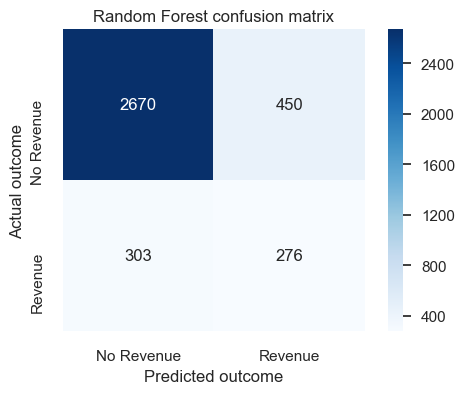

In [459]:
model_performance(random_forest, 'Random Forest',X_test, y_test);

In [460]:
rf_feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

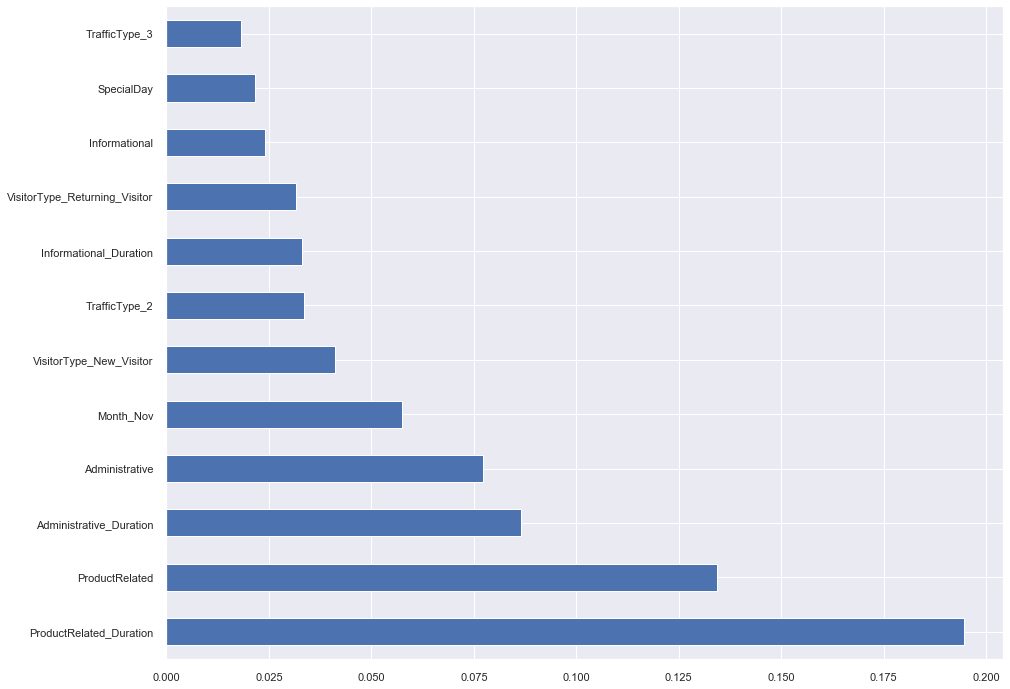

In [461]:
fig, ax = plt.subplots(figsize=(15,12))
rf_feature_importances.iloc[0:12,0].plot(kind='barh',ax=ax);

#### xgboost without google analytics

In [341]:
gb = xgb.XGBClassifier(objective='binary:logistic',n_estimators=100, max_depth=3, learning_rate=.1)
gb_cv = pd.DataFrame(cross_validate(gb, X_train, y_train, cv=5, scoring=['accuracy','precision','recall','f1'], return_train_score=True))
gb_cv.mean()

fit_time           2.070619
score_time         0.024601
test_accuracy      0.844051
train_accuracy     0.853348
test_precision     0.399566
train_precision    0.797797
test_recall        0.027079
train_recall       0.064333
test_f1            0.050576
train_f1           0.118895
dtype: float64

In [338]:
gb0 = xgb.XGBClassifier(objective='binary:logistic',n_estimators=100, max_depth=3, learning_rate=.1, scale_pos_weight=2.3)
gb0 = gb0.fit(X_train,y_train)
y_pred = gb0.predict(X_test)

              precision    recall  f1-score   support

       False       0.88      0.91      0.90      3120
        True       0.41      0.32      0.36       579

    accuracy                           0.82      3699
   macro avg       0.65      0.62      0.63      3699
weighted avg       0.81      0.82      0.81      3699

True Negatives:  2852
False Positives:  268
False Negatives:  392
True Positives:  187
              precision    recall  f1-score   support

       False       0.88      0.91      0.90      3120
        True       0.41      0.32      0.36       579

    accuracy                           0.82      3699
   macro avg       0.65      0.62      0.63      3699
weighted avg       0.81      0.82      0.81      3699



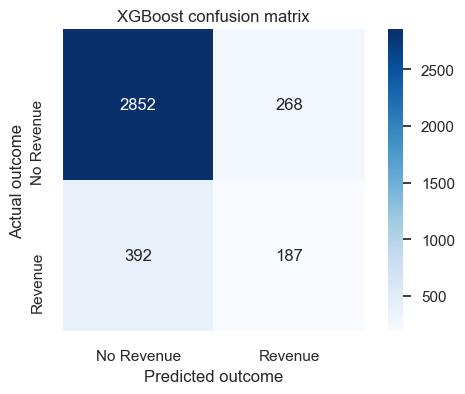

In [339]:
model_performance( gb0, 'XGBoost', X_test, y_test);


## XGBoost w google analytics

In [326]:
gb = xgb.XGBClassifier(objective='binary:logistic',n_estimators=100, max_depth=3, learning_rate=.1, scale_pos_weight=2.3)
gb_cv = pd.DataFrame(cross_validate(gb, X_train, y_train, cv=5, scoring=['accuracy','precision','recall','f1'], return_train_score=True))
gb_cv.mean()

fit_time           2.242368
score_time         0.025024
test_accuracy      0.894221
train_accuracy     0.909367
test_precision     0.631566
train_precision    0.676011
test_recall        0.753971
train_recall       0.790258
test_f1            0.687194
train_f1           0.728645
dtype: float64

In [322]:
gb0 = xgb.XGBClassifier(objective='binary:logistic',n_estimators=100, max_depth=3, learning_rate=.1, scale_pos_weight=2.3)
gb0 = gb0.fit(X_train,y_train)
y_pred = gb0.predict(X_test)

              precision    recall  f1-score   support

       False       0.95      0.92      0.94      3120
        True       0.63      0.76      0.69       579

    accuracy                           0.89      3699
   macro avg       0.79      0.84      0.81      3699
weighted avg       0.90      0.89      0.90      3699

True Negatives:  2866
False Positives:  254
False Negatives:  139
True Positives:  440
              precision    recall  f1-score   support

       False       0.95      0.92      0.94      3120
        True       0.63      0.76      0.69       579

    accuracy                           0.89      3699
   macro avg       0.79      0.84      0.81      3699
weighted avg       0.90      0.89      0.90      3699



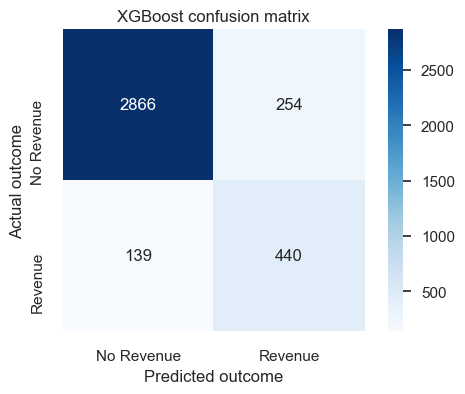

In [323]:
model_performance( gb0, 'XGBoost', X_test, y_test);

In [327]:
xgb_feature_importances = pd.DataFrame(gb0.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [328]:
xgb_feature_importances.head()

,importance
PageValues,0.379170
Month_Nov,0.068504
Month_May,0.053854
Month_Mar,0.049466
VisitorType_Returning_Visitor,0.045664


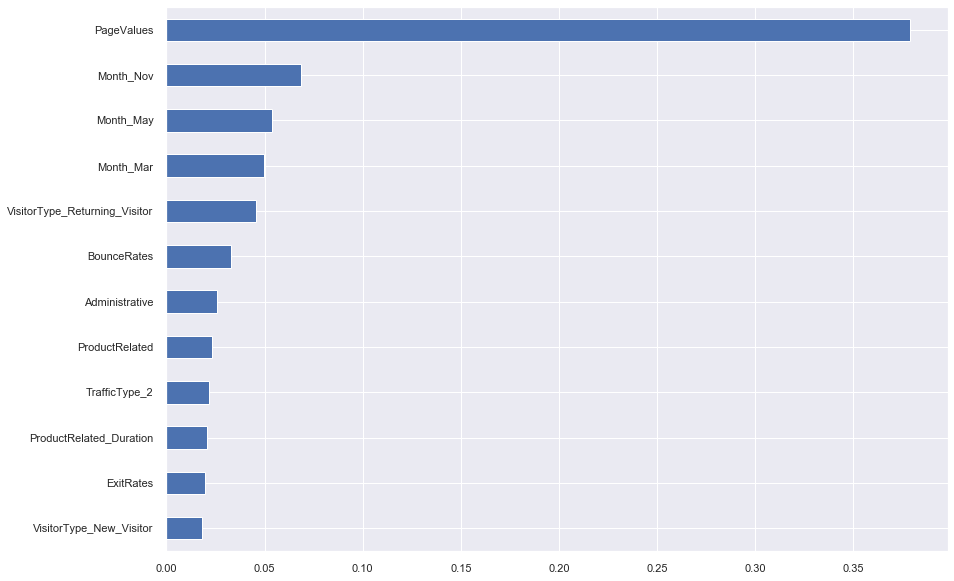

In [331]:
fig, ax = plt.subplots(figsize=(14,10))
xgb_feature_importances.iloc[0:12,0].sort_values(ascending=True).plot(kind='barh',ax=ax);

# Shopper's likelihood to abandon the site

In [438]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

In [439]:
parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.1], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

xgb1 = xgb.XGBClassifier(scale_pos_weight=2.3)

In [441]:

skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)

xgb1 = GridSearchCV(xgb1, parameters, n_jobs=5, 
                   cv= skf.split(X_train,y_train), 
                   scoring='f1',
                   verbose=2, refit=True)

xgb1.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    2.3s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x1c2c97f138>,
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='bin...
                                     silent=None, subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.1],
                         'max_depth': [6], 'min_child_weight': [11],
                         'missing': [-999], 'n_estimators': [5],
                         'objective': ['binary:logistic'

In [ ]:
xgb1()

              precision    recall  f1-score   support

       False       0.95      0.92      0.94      3120
        True       0.64      0.73      0.68       579

    accuracy                           0.89      3699
   macro avg       0.79      0.82      0.81      3699
weighted avg       0.90      0.89      0.89      3699

True Negatives:  2879
False Positives:  241
False Negatives:  159
True Positives:  420
              precision    recall  f1-score   support

       False       0.95      0.92      0.94      3120
        True       0.64      0.73      0.68       579

    accuracy                           0.89      3699
   macro avg       0.79      0.82      0.81      3699
weighted avg       0.90      0.89      0.89      3699



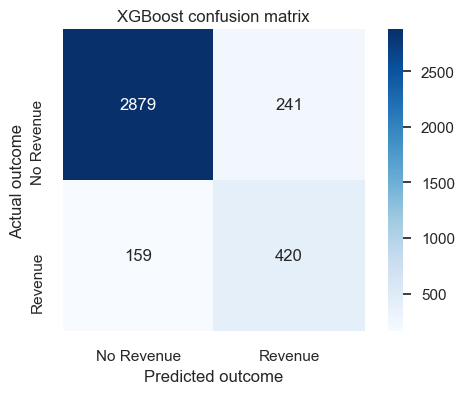

In [444]:
model_performance( xgb1, 'XGBoost', X_test, y_test)

In [449]:
gb= xgb.XGBClassifier(colsample_bytree= 0.7, learning_rate=0.1,
                         max_depth=6, min_child_weight=11,
                         n_estimators=5,
                         objective='binary:logistic',
                         silent=1, subsample=0.8,seed=1337,
            refit=True, return_train_score=False,
             scoring='f1', verbose=2,scale_pos_weight=2.3)

gb_cv = pd.DataFrame(cross_validate(gb, X_train, y_train, cv=5, scoring=['accuracy','precision','recall','f1'], return_train_score=True))


In [450]:
gb_cv.mean()

fit_time           0.170982
score_time         0.019360
test_accuracy      0.897812
train_accuracy     0.907629
test_precision     0.662549
train_precision    0.691699
test_recall        0.694584
train_recall       0.733815
test_f1            0.675128
train_f1           0.709677
dtype: float64

In [ ]:
model_performance(gb1, 'Random Forest',X_test, y_test);

# MORE insights

### What is the difference in behavior between new visitor and returning visitors? Let's make a decision tree plot

In [70]:
# RETURNING VISITORS

returning_visitors = df1[df1['VisitorType_Returning_Visitor']==1]
X_returning= returning_visitors.drop(['Revenue', 'VisitorType_Returning_Visitor'],axis=1)
y_returning= returning_visitors.loc[:,'Revenue']

tree = DecisionTreeClassifier( max_depth=2,class_weight='balanced', min_impurity_decrease = 0.001)
tree.fit(X_returning,y_returning)
  
#visualize it
export_graphviz(tree, out_file="tree_conversion.dot", feature_names=X_returning.columns, proportion=True, rotate=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion.dot")
s.view()

'tree_conversion.dot.pdf'

In [71]:
# NEW VISITORS -> Spends more time on Administrative


new_visitors = df1[(df1['VisitorType_Returning_Visitor']==0) & (df1['VisitorType_Other']==0)]
X_new= new_visitors.drop(['Revenue', 'VisitorType_Returning_Visitor','VisitorType_Other'],axis=1)
y_new= new_visitors.loc[:,'Revenue']

tree = DecisionTreeClassifier( max_depth=2,class_weight='balanced', min_impurity_decrease = 0.001)
tree.fit(X_new,y_new)
  
#visualize it
export_graphviz(tree, out_file="tree_conversion1.dot", feature_names=X_new.columns, proportion=True, rotate=True)
with open("tree_conversion1.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion1.dot")
s.view()

'tree_conversion1.dot.pdf'

### Administrative Pages vs Conversion Rate

In [73]:
df2=df1.copy()
df2['admin_bins']=df2['Administrative']

In [74]:
df2['admin_bins'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: admin_bins, dtype: int64

In [75]:
df2.loc[df2['admin_bins']==0,'admin_bins']='0'

In [76]:
df2.loc[df2['admin_bins']==1,'admin_bins']='1'

In [77]:
df2.loc[df2['admin_bins']==2,'admin_bins']='2'

In [78]:
df2.loc[df2['admin_bins']==3,'admin_bins']='3'

In [79]:
df2.loc[df2['admin_bins']==4,'admin_bins']='4-7'
df2.loc[df2['admin_bins']==5,'admin_bins']='4-7'
df2.loc[df2['admin_bins']==6,'admin_bins']='4-7'
df2.loc[df2['admin_bins']==7,'admin_bins']='4-7'

In [80]:
df2.loc[(df2['admin_bins']==8),'admin_bins']='8-11'
df2.loc[(df2['admin_bins']==9),'admin_bins']='8-11'
df2.loc[(df2['admin_bins']==10),'admin_bins']='8-11'
df2.loc[(df2['admin_bins']==11),'admin_bins']='8-11'

In [81]:
over12=[12,13,14,15,16,17,18,19,20,21,22,23,24,26,27]
for i in over12:
    df2.loc[(df2['admin_bins']==i),'admin_bins']='>=12'

In [82]:
df2['admin_bins'].value_counts()

0       5768
4-7     2110
1       1354
2       1114
3        915
8-11     770
>=12     299
Name: admin_bins, dtype: int64

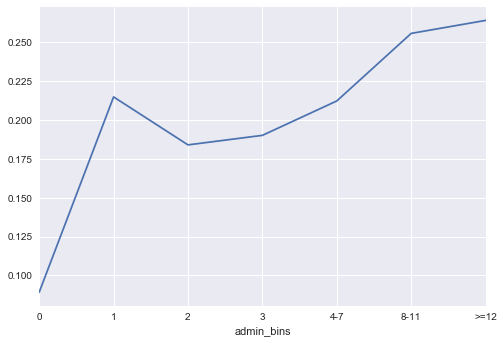

In [83]:
df2.groupby(['admin_bins'])['Revenue'].mean().plot()

## product related duration

In [84]:
df2['product_bins']=df2['ProductRelated']

In [85]:
df2.loc[(df2['product_bins']>=20)&(df2['product_bins']<50),'product_bins']=20

In [86]:
df2.loc[(df2['product_bins']>=50)&(df2['product_bins']<100),'product_bins']=50

In [87]:
df2.loc[(df2['product_bins']>=100)&(df2['product_bins']<150),'product_bins']=100

In [88]:
df2.loc[(df2['product_bins']>=150)&(df2['product_bins']<200),'product_bins']=150
df2.loc[(df2['product_bins']>=200)&(df2['product_bins']<300),'product_bins']=200

df2.loc[(df2['product_bins']>=300)&(df2['product_bins']<400),'product_bins']=300
df2.loc[(df2['product_bins']>=400)&(df2['product_bins']<500),'product_bins']=400
df2.loc[(df2['product_bins']>=500)&(df2['product_bins']<600),'product_bins']=500
df2.loc[(df2['product_bins']>=600)&(df2['product_bins']<700),'product_bins']=600
df2.loc[(df2['product_bins']>=700),'product_bins']=150


In [89]:
df2.groupby(['product_bins'])['Revenue'].sum()

product_bins
0        6.0
1       13.0
2       20.0
3       25.0
4       18.0
5       20.0
6       24.0
7       35.0
8       42.0
9       34.0
10      50.0
11      36.0
12      40.0
13      45.0
14      43.0
15      40.0
16      38.0
17      40.0
18      29.0
19      42.0
20     707.0
50     329.0
100    120.0
150     56.0
200     35.0
300     14.0
400      4.0
500      3.0
600      0.0
Name: Revenue, dtype: float64

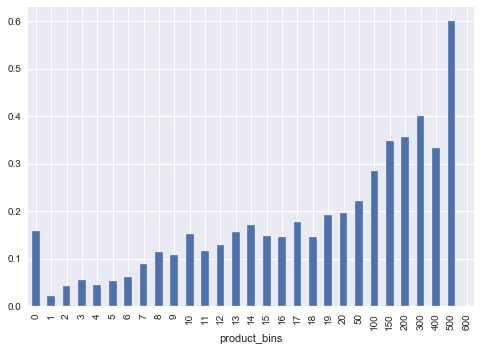

In [92]:
df2.groupby(['product_bins'])['Revenue'].mean().plot(kind='bar')

In [105]:
len(df2[df2['BounceRates']!=0]['Revenue'])

6812

In [107]:
df2[df2['BounceRates']!=0].groupby(['BounceRates'])['Revenue'].mean().mean()

0.18718080785174485

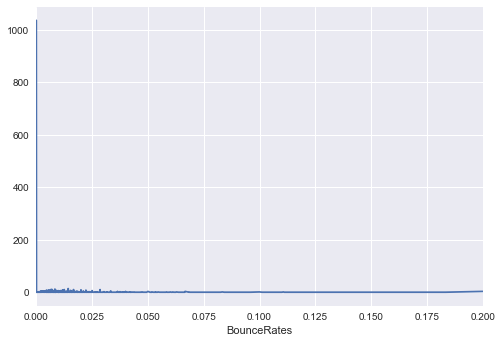

In [94]:
df2.groupby(['BounceRates'])['Revenue'].sum().plot()

In [104]:
len(df2[df2['BounceRates']==0])

5518

In [571]:
df2[df2['BounceRates']==0].groupby(['BounceRates'])['Revenue'].mean()

BounceRates
0.0    0.187749
Name: Revenue, dtype: float64